data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


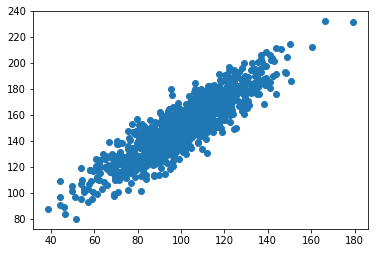

In [2]:
#
# https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

# generate related variables
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100  #Gaussian distribution with a mean of 100 and a standard deviation of 20
data2 = data1 + (10 * randn(1000) + 50)  #added with a mean of a 50 and a standard deviation of 10
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
# plot
pyplot.scatter(data1, data2)
pyplot.show()

In [18]:
# calculate the covariance between two variables
# cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)
from numpy.random import randn
from numpy.random import seed
from numpy import cov
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)

# calculate covariance matrix
covariance = cov(data1, data2)  # return a matrix
# The diagonal of the matrix contains the covariance between each variable and itself. 
# The other values in the matrix represent the covariance between the two variables; 
# in this case, the remaining two values are the same given that we are calculating 
# the covariance for only two variables.
print(covariance)
# The covariance between the two variables is 389.75. We can see that it is positive, 
# suggesting the variables change in the same direction as we expect.

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


In [19]:
# calculate the Pearson's correlation between two variables

# Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))
# The coefficient returns a value between -1 and 1 that represents the limits of 
# correlation from a full negative correlation to a full positive correlation. 
# A value of 0 means no correlation. The value must be interpreted, where often 
# a value below -0.5 or above 0.5 indicates a notable correlation, and values 
# below those values suggests a less notable correlation.
# The pearsonr() SciPy function can be used to calculate the Pearson’s correlation 
# coefficient between two data samples with the same length.
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr

# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

# Running the example calculates and prints the Pearson’s correlation coefficient.

# We can see that the two variables are positively correlated and that the correlation 
# is 0.8. This suggests a high level of correlation, e.g. a value above 0.5 
# and close to 1.0.

Pearsons correlation: 0.888


In [20]:
# calculate the spearmans's correlation between two variables
# Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X)) * stdv(rank(Y)))
# As with the Pearson correlation coefficient, the scores are between -1 and 1 for 
# perfectly negatively correlated variables and perfectly positively correlated respectively.
# Instead of calculating the coefficient using covariance and standard deviations on the samples themselves, 
# these statistics are calculated from the relative rank of values on each sample. This is a common approach 
# used in non-parametric statistics, e.g. statistical methods where we do not assume a distribution of the data 
# such as Gaussian.
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr

# calculate spearman's correlation
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.872


In [21]:
# calculate the covariance between two variables
# cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)

def covar(X, Y):
    n = len(X)
    mean_X = X.mean()
    mean_Y = Y.mean()
    dist_x =[x - mean_X for x in X]
    dist_y =[x - mean_Y for x in Y]
    
    return sum([x*y for x,y in zip(dist_x, dist_y)])*1/(n-1)
    
corr = covar(data1, data2)
corr

389.754561802618

In [28]:
# Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))
import numpy as np
import scipy

def pearson(X, Y):
    return covar(X, Y) / (np.std(X)*np.std(Y))
p = pearson(data1, data2)    
p

0.8885004089885196

In [29]:
# Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X)) * stdv(rank(Y)))
r = scipy.rank(data1)  # ????
r

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  """Entry point for launching an IPython kernel.


1